# Creating Visualizations with new libraries

##### 1. Import Visualization libraries & data
##### 2. Analysis Questions
##### 3. Create Visualizations
- Correlation Matrix Heatmap
- Scatterplot
- Pair Plot
- Categorical Plot

##### 4. Answer Analysis Questions
##### 5. Hypothesis
##### 6. Export Visualizations and Data

### 1. Import Visualization libraries & data

In [1]:
# Import viz libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# check matplotlib version (certain visualizations may be limited for earlier versions)
matplotlib.__version__

'3.7.0'

In [3]:
# Define path
path = r'/Users/jsok/US Education Analysis'

In [4]:
# read csv file 'states_all_new.csv'
df = pd.read_csv(os.path.join(path,'02 Data','states_all_new.csv'), index_col=0)

### 2. Analysis Questions
- Which U.S. Regions have the highest education budget?
- Which U.S. Regions have the highest test scores?
- Which U.S. Regions retain the most students from Pre-K to 12th Grade?
- How does Revenue (government financing) affect test scores? Enrollment?

### 3. Create Visualizations

In [5]:
df.columns

Index(['Primary_Key', 'State', 'Year', 'Total_Revenue', 'Federal_Revenue',
       'State_Revenue', 'Local_Revenue', 'Total_Expenditure',
       'Instruction_Expenditure', 'Support_Services_Expenditure',
       'Other_Expenditure', 'Capital_Outlay_Expenditure', 'Net', 'Grade_PK',
       'Grade_K', 'Grade_4', 'Grade_8', 'Grade_12', 'Grades_All',
       'Avg_Math_4_Score', 'Avg_Math_8_Score', 'Avg_Reading_4_Score',
       'Avg_Reading_8_Score', 'us_region', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27'],
      dtype='object')

In [6]:
df.shape

(1650, 27)

In [7]:
# Subset excluding 'Primary_Key', 'State', 'Year', 'us_region', 'Federal_Revenue', 'State_Revenue', 'Local_Revenue', 'Instruction_Expenditure', 'Support_Services_Expenditure', 'Other_Expenditure', 'Capital_Outlay_Expenditure'

sub = df[['Total_Revenue', 'Total_Expenditure',  'Net', 'Grade_PK', 'Grade_K', 'Grade_4', 'Grade_8', 'Grade_12', 'Grades_All', 'Avg_Math_4_Score', 'Avg_Math_8_Score', 'Avg_Reading_4_Score', 'Avg_Reading_8_Score']]
sub

Total_Revenue  Total_Expenditure     Net  Grade_PK   Grade_K   Grade_4  \
0         2678885.0          2653798.0   25087    8224.0   55460.0   57948.0   
1         1049591.0           972488.0   77103    2371.0   10152.0    9748.0   
2         3258079.0          3401580.0 -143501    2544.0   53497.0   55433.0   
3         1711959.0          1743022.0  -31063     808.0   33511.0   34632.0   
4        26260025.0         27138832.0 -878807   59067.0  431763.0  418418.0   
...             ...                ...     ...       ...       ...       ...   
1678            NaN                NaN       0       NaN       NaN       NaN   
1679            NaN                NaN       0       NaN       NaN       NaN   
1680            NaN                NaN       0       NaN       NaN       NaN   
1681            NaN                NaN       0       NaN       NaN       NaN   
1682            NaN                NaN       0       NaN       NaN       NaN   

       Grade_8  Grade_12  Grades_All  Avg_Math_4_Score  Avg_Math_8_Score  \
0      58025.0   41167.0    731634.0             208.0             252.0   
1       8789.0    6714.0    122487.0               NaN               NaN   
2      49081.0   37410.0    673477.0             215.0             265.0   
3      36011.0   27651.0    441490.0             210.0             256.0   
4     363296.0  270675.0   5254844.0             208.0             261.0   
...        ...       ...         ...               ...               ...   
1678       NaN       NaN         NaN             247.0             287.0   
1679       NaN       NaN         NaN             240.0             286.0   
1680       NaN       NaN         NaN             231.0             272.0   
1681       NaN       NaN         NaN             242.0             289.0   
1682       NaN       NaN         NaN             246.0             286.0   

      Avg_Reading_4_Score  Avg_Reading_8_Score  
0                   207.0                  NaN  
1                     NaN                  NaN  
2                   209.0                  NaN  
3                   211.0                  NaN  
4                   202.0                  NaN  
...                   ...                  ...  
1678                224.0                262.0  
1679                220.0                266.0  
1680                213.0                256.0  
1681                220.0                267.0  
1682                227.0                265.0  

[1650 rows x 13 columns]

### Correlation Matrix Heatmap

Text(0.5, 1.0, 'Correlation Matrix Heatmap - US Education')

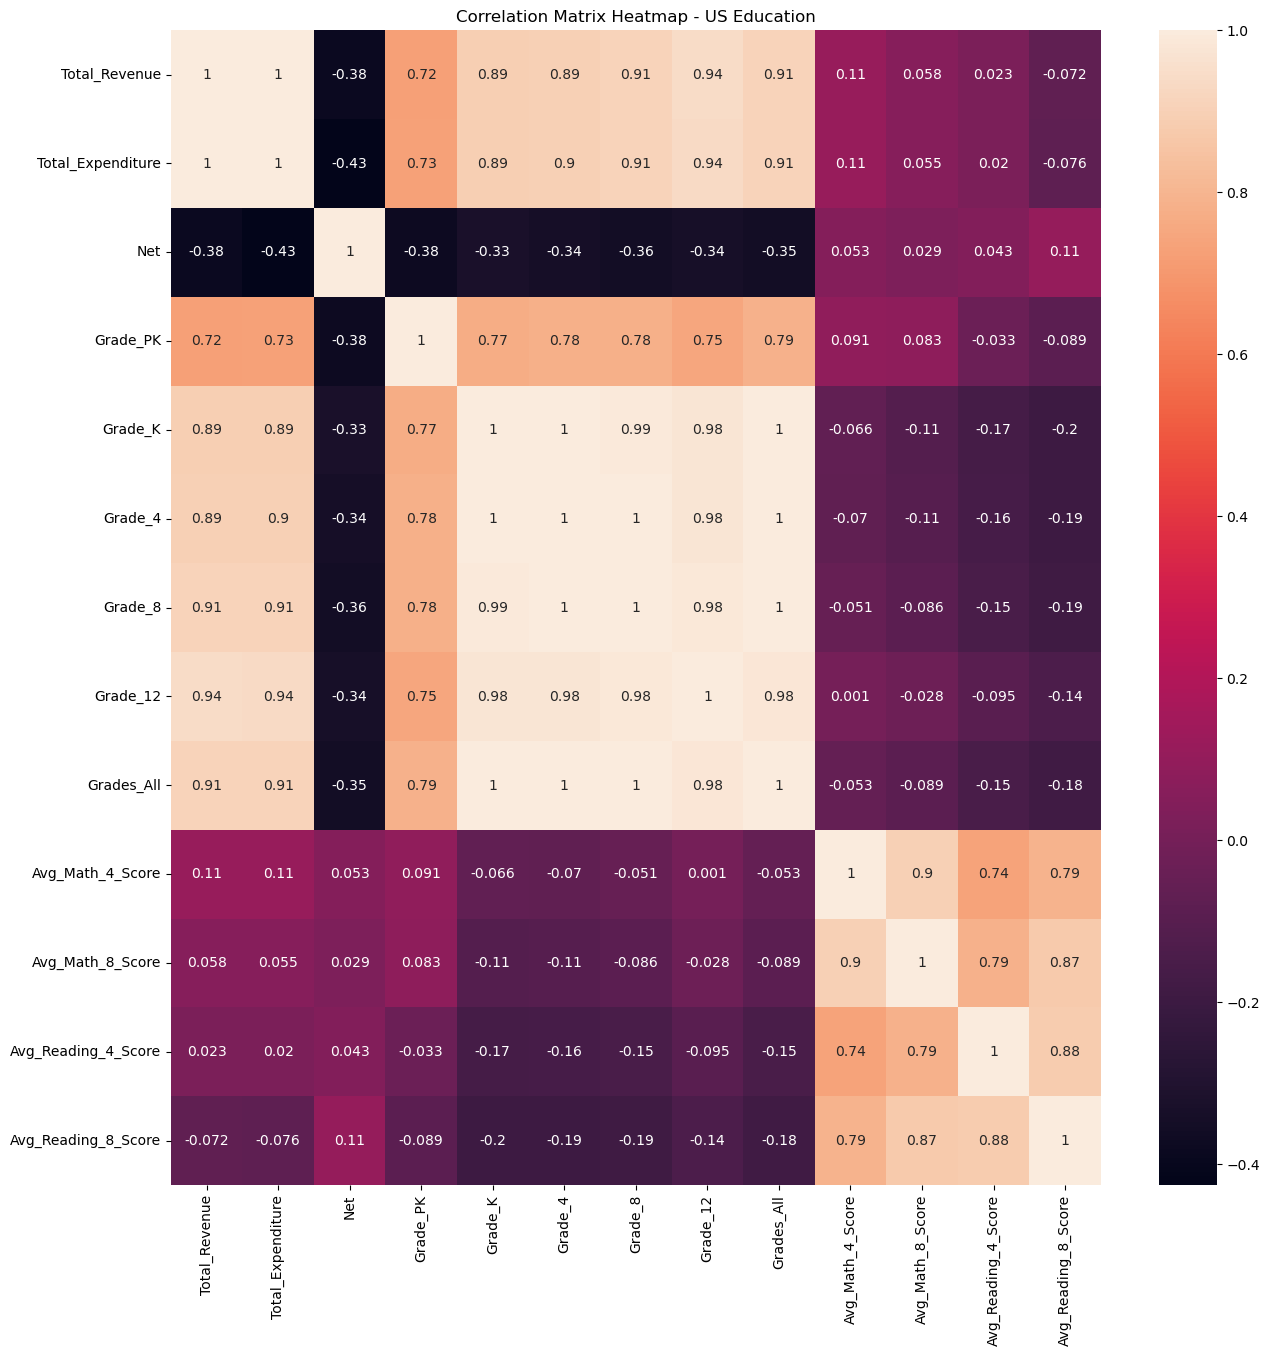

In [8]:
# Subplot with matplotlib
f,ax = plt.subplots(figsize=(15,15))

# Correlation heatmap in seaborn 
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) 

# The 'annot=True' argument allows the plot to place correlation coefficients located in heatmap.

# axis lebels and title
plt.title('Correlation Matrix Heatmap - US Education')

#### The coefficients portrayed above show weak negative, inverse relationships.  However, some moderately strong and strong positive relationships (i.e. Revenue/Expenditure and Enrollment in each grade, or Math and Reading Test Scores)

### Scatterplots

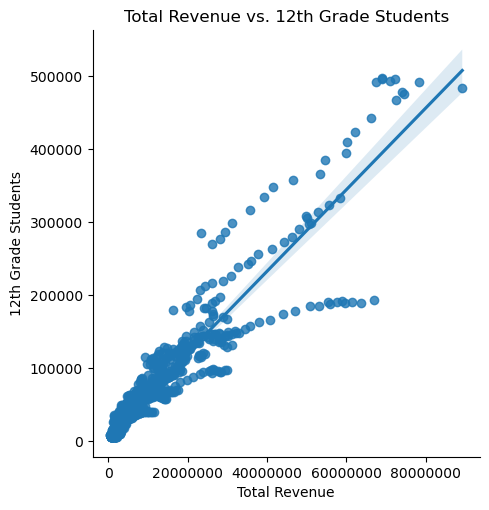

In [9]:
# Scatterplot for the 'Total_Revenue' and 'Grade_12' columns in seaborn

scat_1 = sns.lmplot(x = 'Total_Revenue', y = 'Grade_12', data = df)
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

# axis lebels and title
plt.xlabel('Total Revenue')
plt.ylabel('12th Grade Students')
plt.title('Total Revenue vs. 12th Grade Students')

# ensure the visual image fits
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True}) 

#### This relationship reveals the more Total Revenue spent on Education, the more 12th Graders are likely to enroll in school.  Most data points have a relatively low variance (lie close to the line of best fit) below 20,000,000 Revenue and below 200,000 12th Graders - a strong relationship. But past 20,000,000 Revenue, there is less data recorded and higher variance.

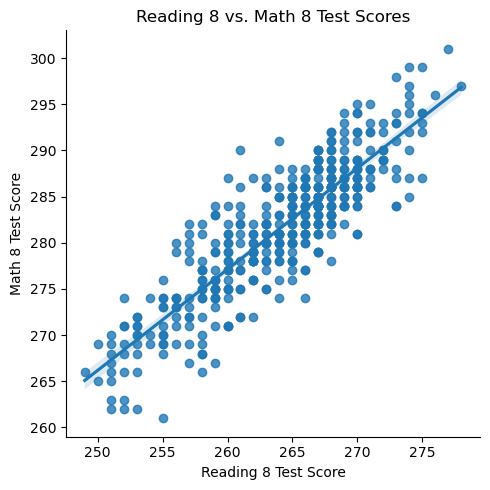

In [10]:
# Scatterplot for the 'Avg_Reading_8_Score' and 'Avg_Math_8_Score' columns in seaborn

scat_2 = sns.lmplot(x = 'Avg_Reading_8_Score', y = 'Avg_Math_8_Score', data = df)

# axis lebels and title
plt.xlabel('Reading 8 Test Score')
plt.ylabel('Math 8 Test Score')
plt.title('Reading 8 vs. Math 8 Test Scores')

# ensure the visual image fits
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True}) 

#### The relationship between 8th Grade Math and Reading Test scores is quite strong, with most data remaining quite close to the line of best fit.  However, there are a few outliers - Average Reading Test Scores below 245 are slightly more sporadic.

### Pair Plot

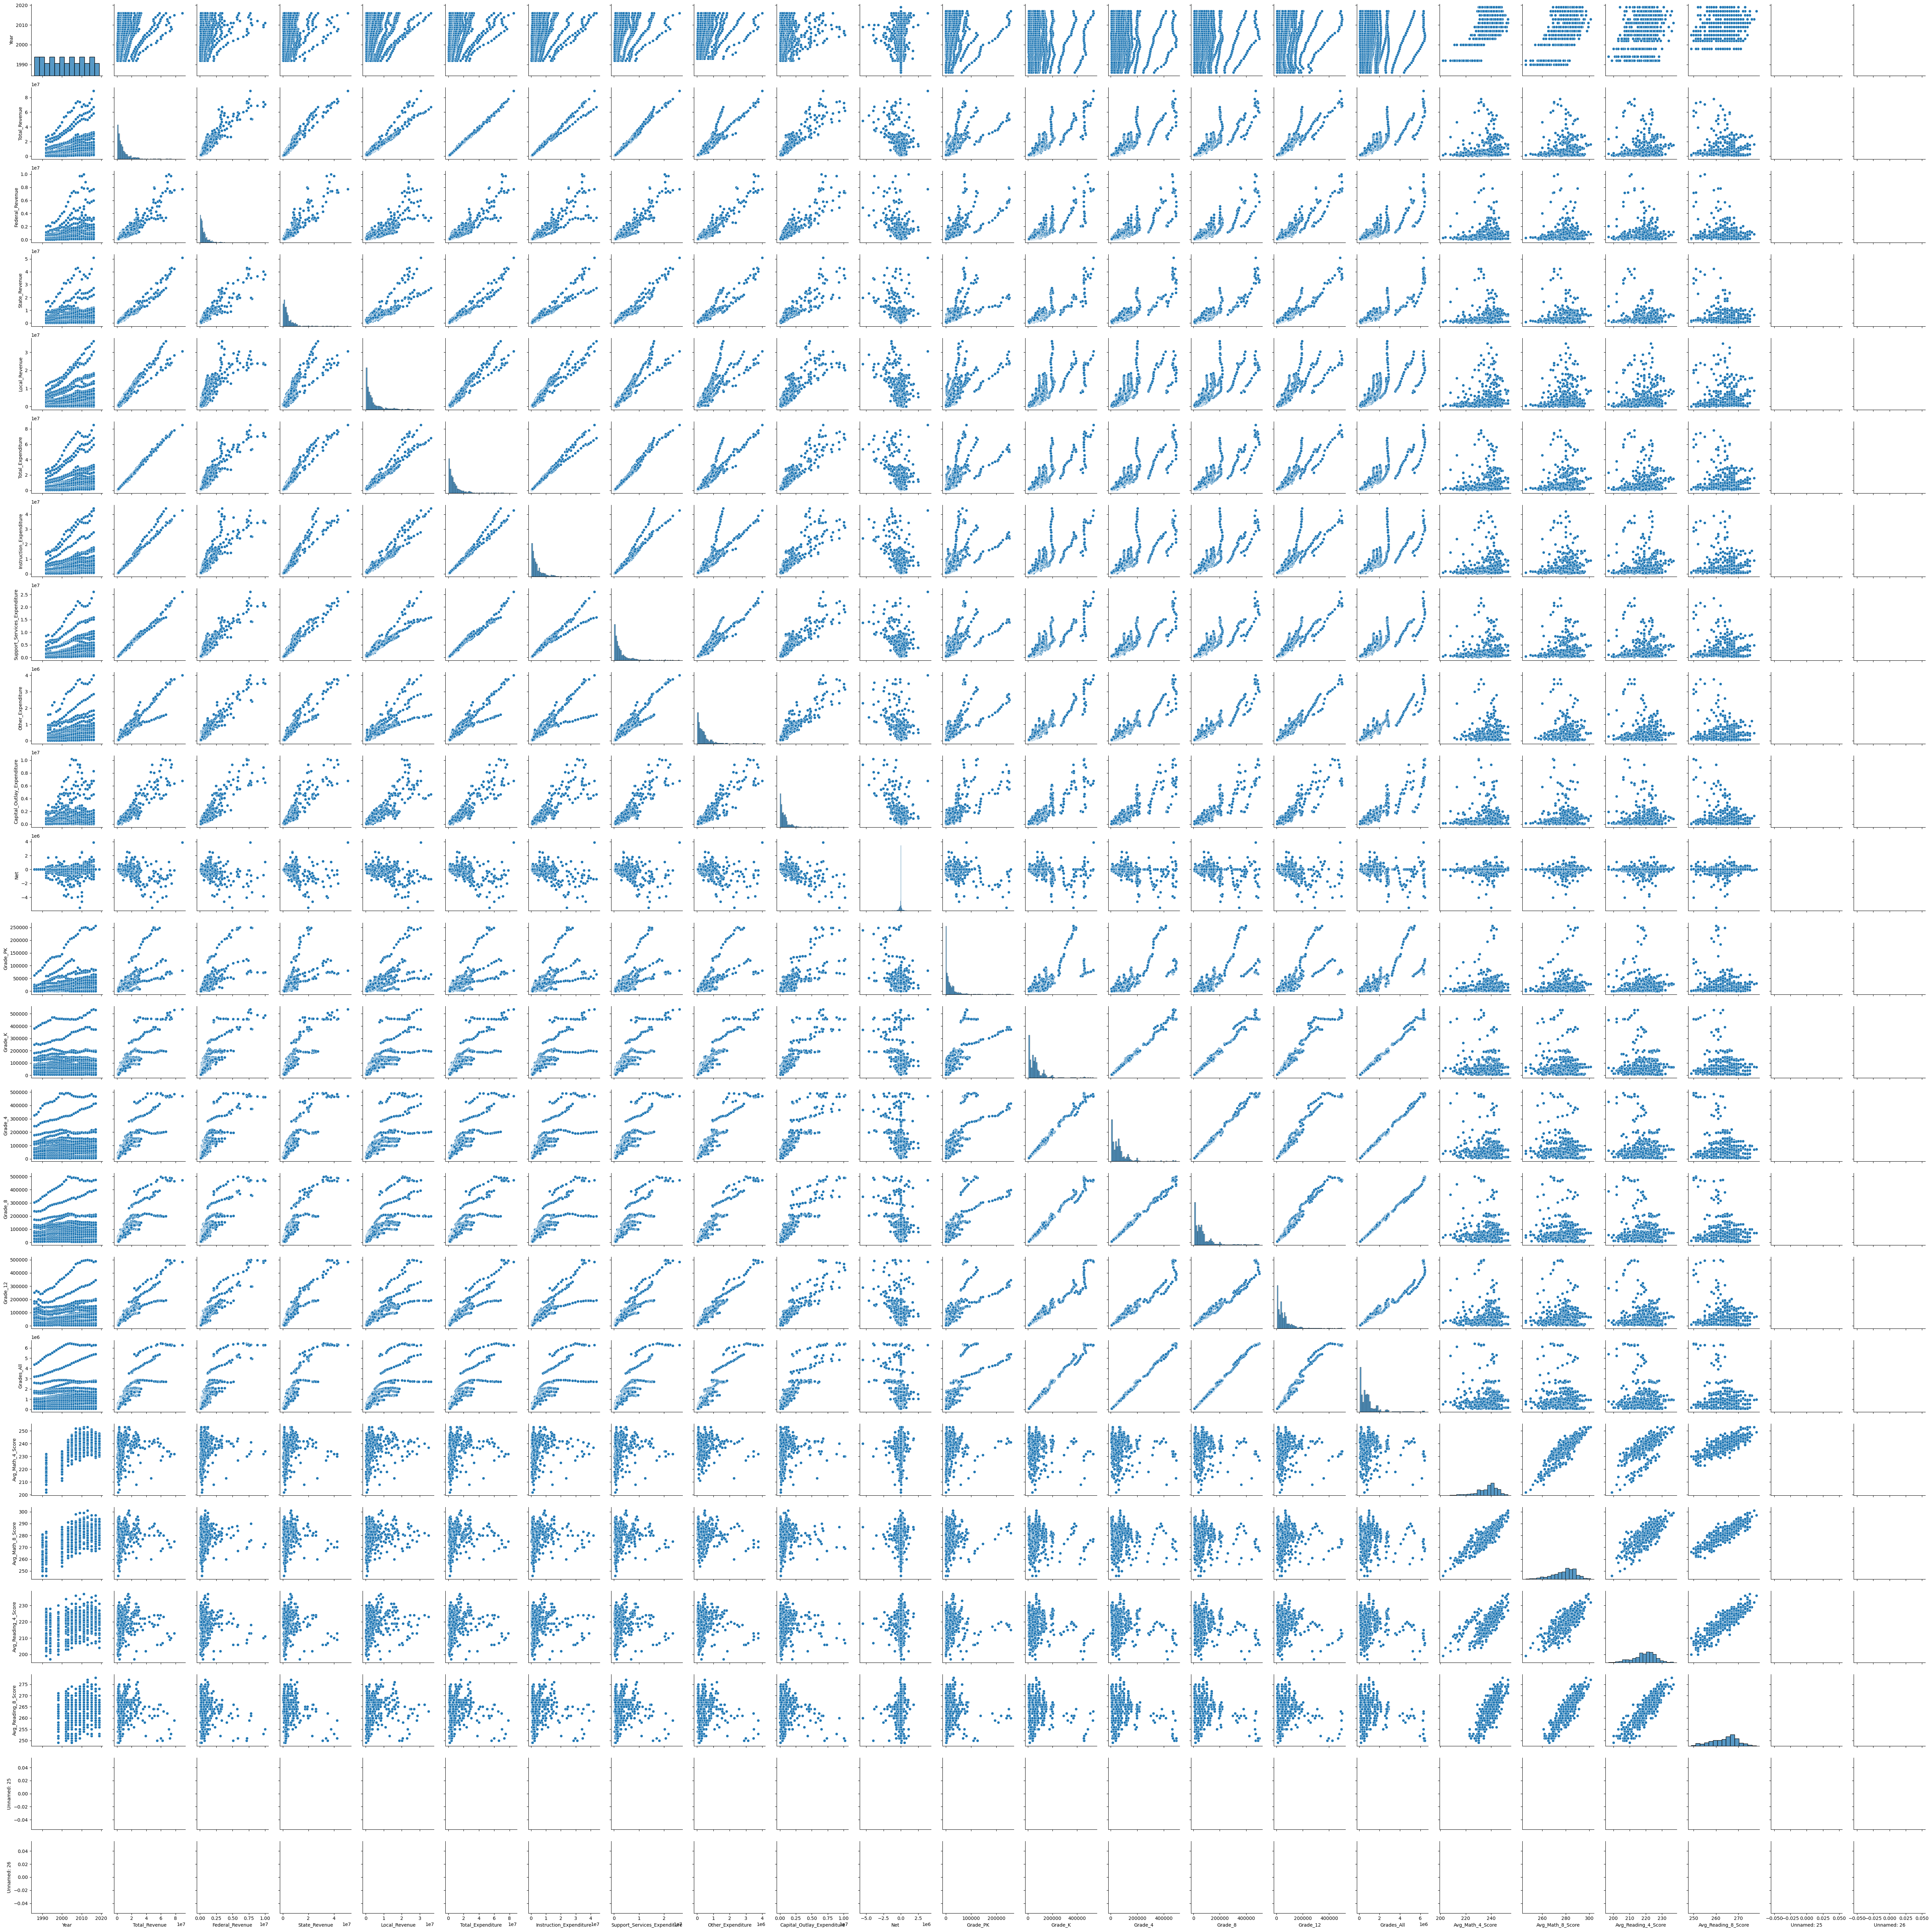

In [11]:
# Create a pair plot of entire dataset

PP = sns.pairplot(df)

#### I would like to look into 'us_region' and 'net' to analyze how each well-financed each US Region is in terms of Education funding and spending.  
#### I would also like to view 'us_region' by Test Scores to see which regions have scored the highest and lowest.  

### Categorical Plot

In [12]:
df.columns

Index(['Primary_Key', 'State', 'Year', 'Total_Revenue', 'Federal_Revenue',
       'State_Revenue', 'Local_Revenue', 'Total_Expenditure',
       'Instruction_Expenditure', 'Support_Services_Expenditure',
       'Other_Expenditure', 'Capital_Outlay_Expenditure', 'Net', 'Grade_PK',
       'Grade_K', 'Grade_4', 'Grade_8', 'Grade_12', 'Grades_All',
       'Avg_Math_4_Score', 'Avg_Math_8_Score', 'Avg_Reading_4_Score',
       'Avg_Reading_8_Score', 'us_region', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27'],
      dtype='object')

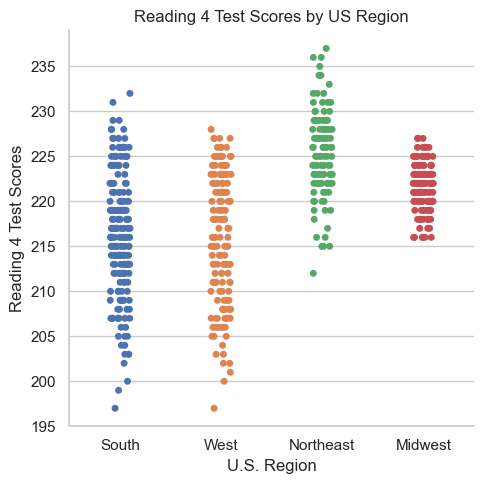

In [13]:
# Categorical plot in seaborn 'us_region' vs 'Avg_Reading_4_Score'

sns.set(style="whitegrid") # horizontal gridlines
reading_4 = sns.catplot(x="us_region", y="Avg_Reading_4_Score", hue="us_region", data=df)

# axis lebels and title
plt.xlabel('U.S. Region')
plt.ylabel('Reading 4 Test Scores')
plt.title('Reading 4 Test Scores by US Region')

# ensure the visual image fits
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True}) 

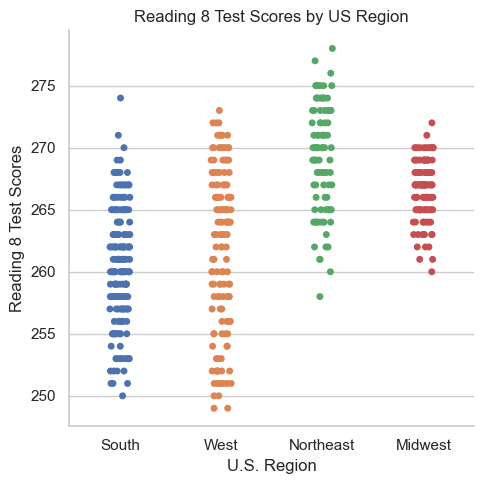

In [14]:
# Categorical plot in seaborn 'us_region' vs 'Avg_Reading_8_Score'

sns.set(style="whitegrid") # horizontal gridlines
reading_8 = sns.catplot(x="us_region", y="Avg_Reading_8_Score", hue="us_region", data=df)

# axis lebels and title
plt.xlabel('U.S. Region')
plt.ylabel('Reading 8 Test Scores')
plt.title('Reading 8 Test Scores by US Region')

# ensure the visual image fits
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True}) 

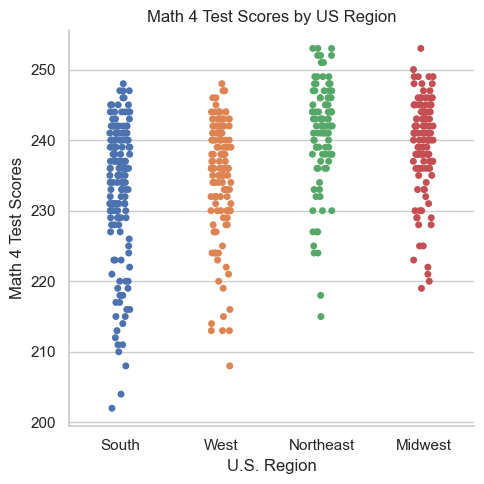

In [15]:
# Categorical plot in seaborn 'us_region' vs 'Avg_Math_4_Score'

sns.set(style="whitegrid") # horizontal gridlines
math_4 = sns.catplot(x="us_region", y="Avg_Math_4_Score", hue="us_region", data=df)
#plt.ticklabel_format(style='plain', axis='y') # prevent scientific notation

# axis lebels and title
plt.xlabel('U.S. Region')
plt.ylabel('Math 4 Test Scores')
plt.title('Math 4 Test Scores by US Region')

# ensure the visual image fits
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True}) 

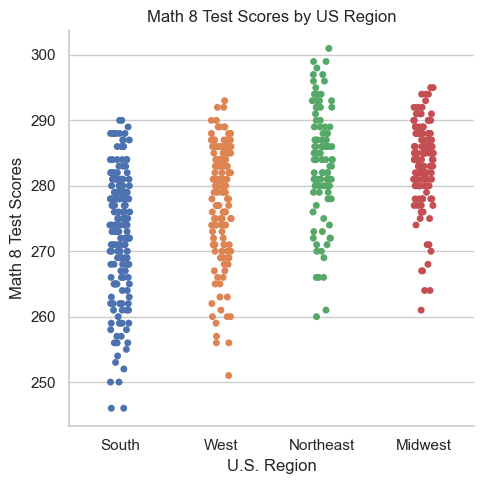

In [16]:
# Categorical plot in seaborn 'us_region' vs 'Avg_Math_8_Score'

sns.set(style="whitegrid") # horizontal gridlines
math_8 = sns.catplot(x="us_region", y="Avg_Math_8_Score", hue="us_region", data=df)

# axis lebels and title
plt.xlabel('U.S. Region')
plt.ylabel('Math 8 Test Scores')
plt.title('Math 8 Test Scores by US Region')

# ensure the visual image fits
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True}) 

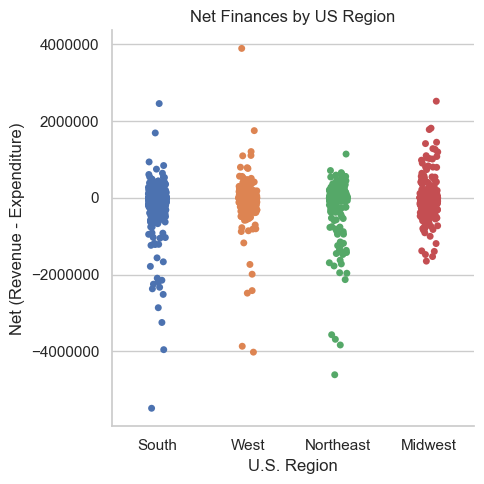

In [17]:
# Categorical plot in seaborn 'us_region' vs 'Net'

sns.set(style="whitegrid") # horizontal gridlines
net = sns.catplot(x="us_region", y="Net", hue="us_region", data=df)
plt.ticklabel_format(style='plain', axis='y') # prevent scientific notation

# axis lebels and title
plt.xlabel('U.S. Region')
plt.ylabel('Net (Revenue - Expenditure)')
plt.title('Net Finances by US Region')

# ensure the visual image fits
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True}) 

## 4. Answer Analysis Questions

#### Which U.S. Regions have the highest education budget?
- It appears that most education budgets are fairly toe-to-toe across U.S. Regions.  There is hardly any disparity.
#### Which U.S. Regions have the highest test scores?
- On average, it appears that the Northeast and Midwest regions have the highest test scores from measured tests (Math 4, Math 8, Reading 4, and Reading 8).
#### Which U.S. Regions retain the most students from Pre-K to 12th Grade?
- It seems as though Western States have the most retention of students from Pre-K to 12th Grade.  However, this does not take into account factors, such as population differences or home schooling.
#### How does Revenue (government financing) affect test scores? Enrollment?
- Higher Revenue does not have a strong relationship with test scores.  It does, however, have a very strong correlation with overall Enrollment.

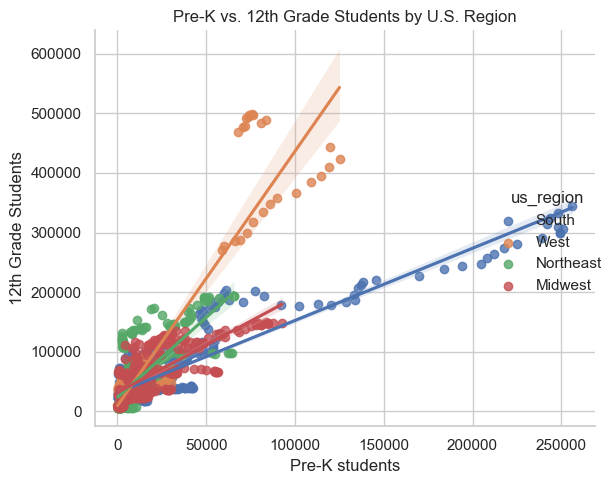

In [18]:
# Scatterplot for the 'Avg_Reading_8_Score' and 'Avg_Math_8_Score' columns in seaborn

scat_3 = sns.lmplot(x = 'Grade_PK', y = 'Grade_12', data = df, hue='us_region')

# axis lebels and title
plt.xlabel('Pre-K students')
plt.ylabel('12th Grade Students')
plt.title('Pre-K vs. 12th Grade Students by U.S. Region')

# ensure the visual image fits
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True}) 

## 5. Hypotheses

- The higher Revenue, the more students enroll in school (all grade levels).
- The higher Expenditure, the more students enroll in school (all grade levels).
- If a student scores high on a Reading Test, they will score high on a Math Test.
- If a student resides in a Western State, they are more likely to stay in school.

## 6. Export Visualizations and Data

In [19]:
# Export & save visualizations
corr.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','corr_matrix_heatmap.png'))

scat_1.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','revenue_vs_grade12.png'))

scat_2.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','math8_vs_reading8.png'))

scat_3.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','retention_preK_vs_12th.png'))

reading_4.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','reading_4_tests_USregions.png'))

reading_8.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','reading_8_tests_USregions.png'))

math_4.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','math_4_tests_USregions.png'))

math_8.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','math_8_tests_USregions.png'))

net.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','net_finances_USregions.png'))


In [20]:
# Export csv file

df.to_csv(os.path.join(path, '02 Data', 'states_all_new.csv'))